In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# from metas_unclib import *

Definiciones

In [19]:
WD = np.array([8.36439, 9.40267, 10.1072, 10.7922, 11.1526])#, 13.0717])
pixels = np.array([5558.662, 5579.416, 5637.8081, 5692.8839, 5656.0473])#, 5643.1325], dtype=float)
u_pixels = np.array([0.049, 0.0466, 0.05468, 0.05338, 0.0578])#, 0.05718]) * np.sqrt(4000)

Ajuste

In [6]:
ORDEN = 3

In [20]:
from metas_unclib import *

WD_u = [ufloat(v) for v in WD]
pixels_u = [ufloat(v, u) for v, u in zip(pixels, u_pixels)]

model = unumlib.polyfit(WD_u, pixels_u, ORDEN)  # Definir orden del ajuste

model_vals = unumlib.polyval(model, WD_u)
r2 = r2_score(pixels, get_value(model_vals))

print("Coeficientes:", model)
print("Coeficiente de determinación R^2:", r2)

Coeficientes: [-37.33991481184315 ± 0.04747343789961483
 1092.3905374616327 ± 1.3856553079159173
 -10543.759639579845 ± 13.407625268463693
 39175.80791388693 ± 42.99989165886165]
Coeficiente de determinación R^2: 0.9782623017994218


Gráfico

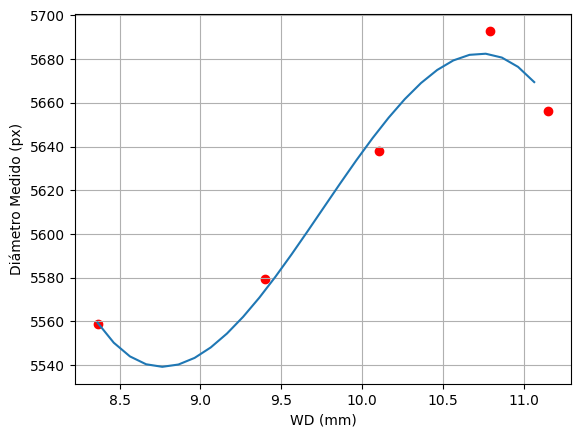

In [21]:
x = np.arange(WD.min(), WD.max(), 0.1)
x2 = ufloatarray(x, np.zeros((len(x), len(x))) )
y = unumlib.polyval(model, x2)

mens = np.array(get_value(y))
unc = np.array(get_stdunc(y))

fig, ax = plt.subplots()
ax.plot(x, mens)
ax.fill_between(x, mens-unc, mens+unc ,alpha=0.3)
ax.scatter(WD, pixels, c='r')
ax.set_xlabel('WD (mm)') 
ax.set_ylabel('Diámetro Medido (px)') 
ax.grid()

Evaluar en WD del patron

In [23]:
# Definir
wd_pat = 9.65993
peso_pixel = ufloat(0.2695, 1e-05)

diam_ajustado = unumlib.polyval(model, [wd_pat])
diam = peso_pixel * diam_ajustado[0]

print(diam_ajustado)
print("Diametro Linea: ", diam)

[5600.8899530482595 ± 0.0379055993871397]
Diametro Linea:  1509.439842346506 ± 0.056932894472438995


Guardado

In [18]:
ustorage.save_binary_file(diam, "diam_ajustado.ufloat")

In [19]:
# Carga
ustorage.load_binary_file("diam_ajustado.ufloat")

1319.4273367632468 ± 3.1091090007435773